In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

loading the dataset

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

im gonna add feature names and target names for better understanding

In [6]:
import pandas as pd
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


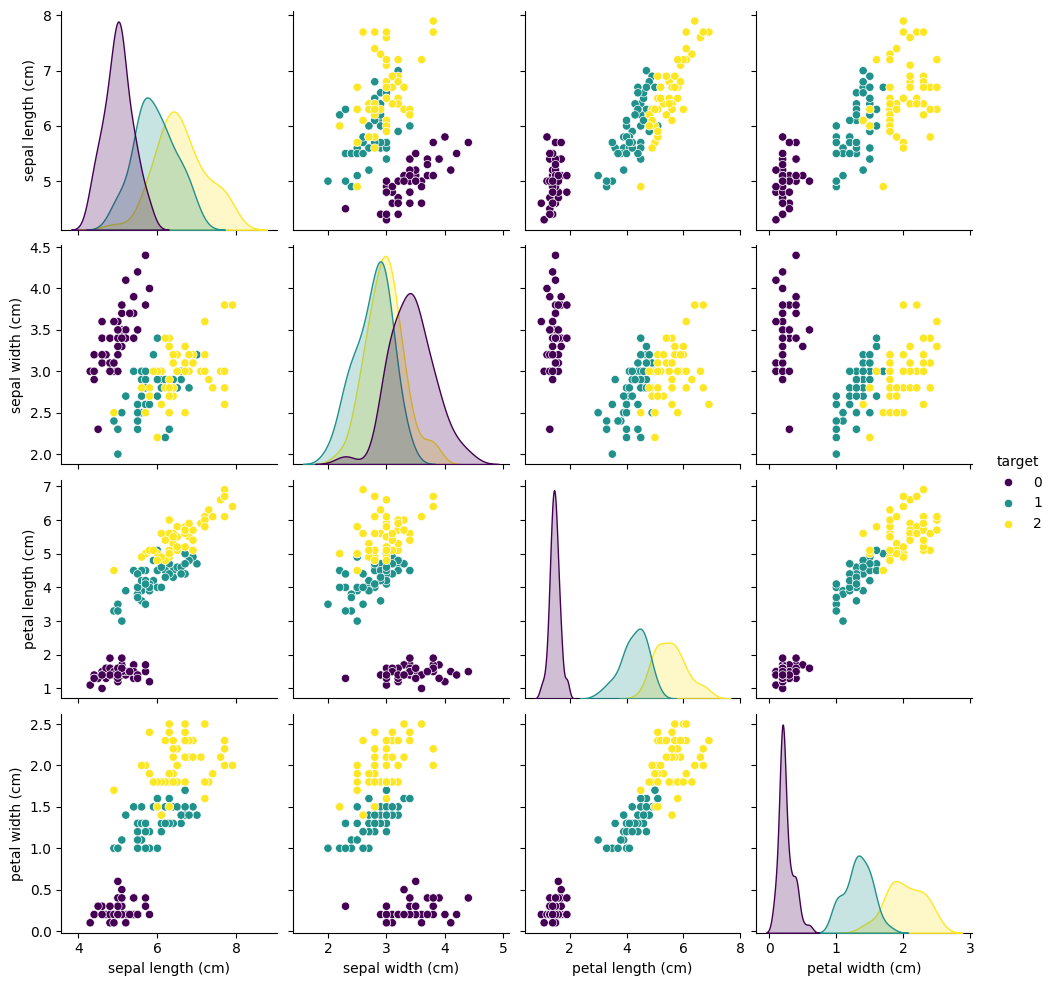

In [7]:
sns.pairplot(df, hue='target', palette='viridis')
plt.show()

binary classification with logistic regression

In [8]:
X_bin = X[df['target'] != 2]
y_bin = y[df['target'] != 2]

split the data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

stardartizing the features

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


im gonna train the model with using the logistic regression

In [11]:
model_bin = LogisticRegression()
model_bin.fit(X_train, y_train)
y_pred_bin = model_bin.predict(X_test)
accuracy_bin = accuracy_score(y_test, y_pred_bin)
print(f"Accuracy (Binary): {accuracy_bin}")

Accuracy (Binary): 1.0


multi-class classification

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_multi = LogisticRegression(solver='lbfgs', max_iter=1000)
model_multi.fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

evaluation the multiclass model

In [13]:
accuracy_multi = accuracy_score(y_test, y_pred_multi)
print(f"Accuracy (Multiclass): {accuracy_multi}")

Accuracy (Multiclass): 1.0


confusion matrix and classification report

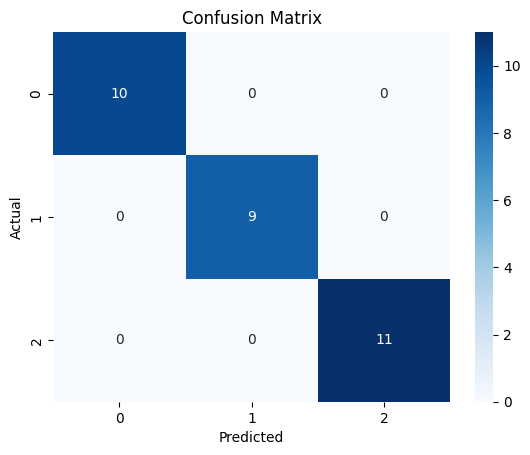

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
cm = confusion_matrix(y_test, y_pred_multi)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_multi))


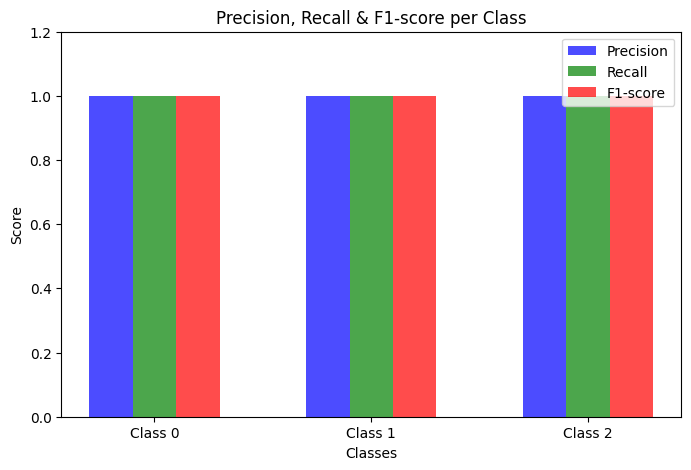

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Sample data from the classification report
labels = ['Class 0', 'Class 1', 'Class 2']
precision = [1.00, 1.00, 1.00]
recall = [1.00, 1.00, 1.00]
f1_score = [1.00, 1.00, 1.00]

# Plot Precision, Recall, and F1-score
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.2
index = np.arange(len(labels))

ax.bar(index, precision, bar_width, label='Precision', color='blue', alpha=0.7)
ax.bar(index + bar_width, recall, bar_width, label='Recall', color='green', alpha=0.7)
ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-score', color='red', alpha=0.7)

ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall & F1-score per Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(0, 1.2)

plt.show()
